In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown as md
from collections import namedtuple
from dataclasses import dataclass
from typing import Any, List
import scipy
# %connect_info

In [2]:
display(md("### connect to board"))
# board @ Manny is 47; board @ Bill is 45
%run rocstar_init 45
tp.cal()
f.setup_waveform_readout()
f.set_calib_mode(calib_mode=True, sine_enable=True)
tdat = f.readout_one_trigger()

### connect to board

rocstar_init.py starting at Wed May  1 10:25:16 2019
connecting to board 45
++ check whether board is alive
ping -c 1 192.168.1.45
192.168.1.45 is alive
++ ssh connect
ssh root@192.168.1.45
 uptime  10:24:10 up 15 days, 16:46,  0 users,  load average: 7.96, 7.95, 7.95 
# Check that /mnt/uzed is present
/mnt/uzed
# Configure Zynq PL
cat uzed_rocstar_11.bin >> /dev/xdevcfg
# Check Zynq PL bus I/O
./rd 0002 && ./rd 0001
busio: rd 0002 ==> dead
busio: rd 0001 ==> beef
# Check that /mnt/uzed is present
/mnt/uzed
# Configure Spartan6 FPGA
./spartan6_config.elf rocstar.bin
main program, 2019-02-15 13:10
rd 0 -> 1752, rd 1 -> beef, rd 2 -> dead
busrd(5) -> 10
INIT asserted OK
busrd(5) -> 0
INIT deasserted OK
reading Spartan6 configuration data from rocstar.bin
1000000
2000000
3000000
sent 3319844 configuration bytes to Spartan6
rd 5 -> 0001
# Check Spartan6 bus I/O
./v5rd 0013 && ./v5rd 0001
busio: a7rd 0013 ==> 6666
busio: a7rd 0001 ==> beef
# Start weiwei server
./server.elf >> /dev/null &
-

### trigger, read, and display one waveform

put DRS4 inputs into calibration mode, sine waves ON
s6:0006 = 0000000000110000
tcell=1000111010 ddfdat[3]=101000111010
tcell=23a ddfdat[3]=a3a


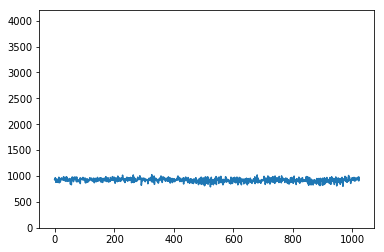

In [3]:
display(md("### trigger, read, and display one waveform"))
which_drs = 1
f.set_calib_mode(calib_mode=True, sine_enable=True)
tdat = f.readout_one_trigger(verbose=False, whichdrs=which_drs)
plt.plot(tdat.wavedat)
plt.axis([None,None,0,4200])
print("tcell={:010b} ddfdat[3]={:010b}".format(
    tdat.tcell, tdat.ddfdat[3]))
print("tcell={:03x} ddfdat[3]={:03x}".format(
tdat.tcell, tdat.ddfdat[3]))